In [1]:
from accelerator import Lattice
from accelerator.elements import Drift, QuadrupoleThin
from accelerator import Beam
import numpy as np
import matplotlib.pyplot as plt

# transporting phase space coords

In [2]:
d = Drift(1)  # just a drift

In [3]:
lat = Lattice([d])

In [4]:
particle = lat.transport(phasespace=[1, 1, 0])

In [5]:
particle.u

array([1., 2.])

In [6]:
particle.u_prime

array([1., 1.])

# transporting twiss parameters

In [7]:
twiss = lat.transport(twiss=[1, 0, 1])

In [8]:
twiss.beta

array([1., 2.])

In [9]:
twiss.alpha

array([ 0., -1.])

In [10]:
twiss.gamma

array([1., 1.])

In [11]:
twiss.s

[0, 1]

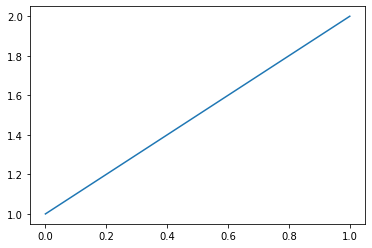

In [12]:
plt.plot(twiss.s, twiss.beta)

# beam phase space ellipse

In [13]:
beam = Beam()

In [14]:
u, u_prime, dp = beam.ellipse([1,0,1])

In [15]:
u.shape

(1000,)

In [16]:
u_prime.shape

(1000,)

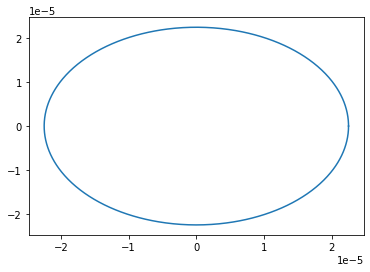

In [17]:
plt.plot(u, u_prime)

In [18]:
beam.ellipse([1,0,1])[0].T.shape

(1000,)

# transporting the ellipse through a drift

In [19]:
ellipses = lat.transport(phasespace=beam.ellipse([1,0,1]))

In [20]:
u.shape

(1000,)

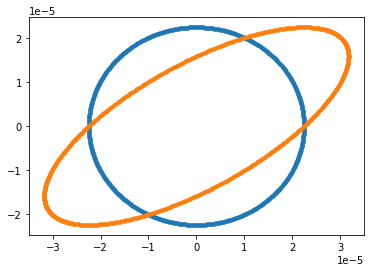

In [21]:
plt.plot(ellipses.u, ellipses.u_prime, linewidth=0, marker='.')

# Now with a fodo cell

In [22]:
beam = Beam()

In [23]:
f = 0.8  # focal length (m)
L = 1.  # drift length (m). Note FODO total length: 2L

half_quad_F = QuadrupoleThin(2.*f)
quad_D = QuadrupoleThin(-f)
drift = Drift(L)

In [24]:
FODO = Lattice([half_quad_F, drift, quad_D, drift, half_quad_F])

In [25]:
ellipse = beam.ellipse(FODO.m_h.twiss_solution)

In [26]:
ellipses = FODO.transport(phasespace=ellipse)

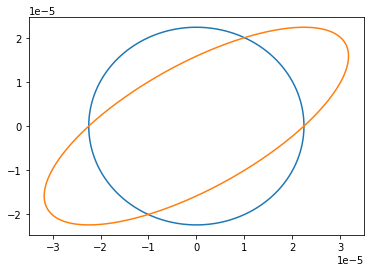

In [28]:
plt.plot(ellipses.u, ellipses.u_prime);

# slicing drift to get better beta curves

In [29]:
twiss = FODO.slice(Drift, 20).transport(twiss=FODO.m_h.twiss_solution)

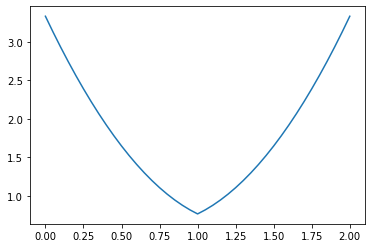

In [30]:
plt.plot(twiss.s, twiss.beta)

# vizualize particle trajectories through 8 fodo cells

In [32]:
particles = (FODO*8).transport(phasespace=Beam(n_particles=10).match(FODO.m_h.twiss_solution))

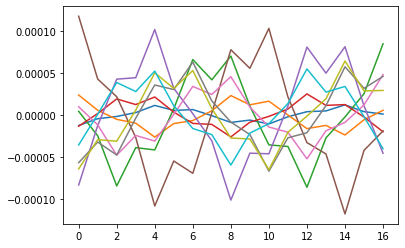

In [34]:
plt.plot(particles.s, particles.u.T);